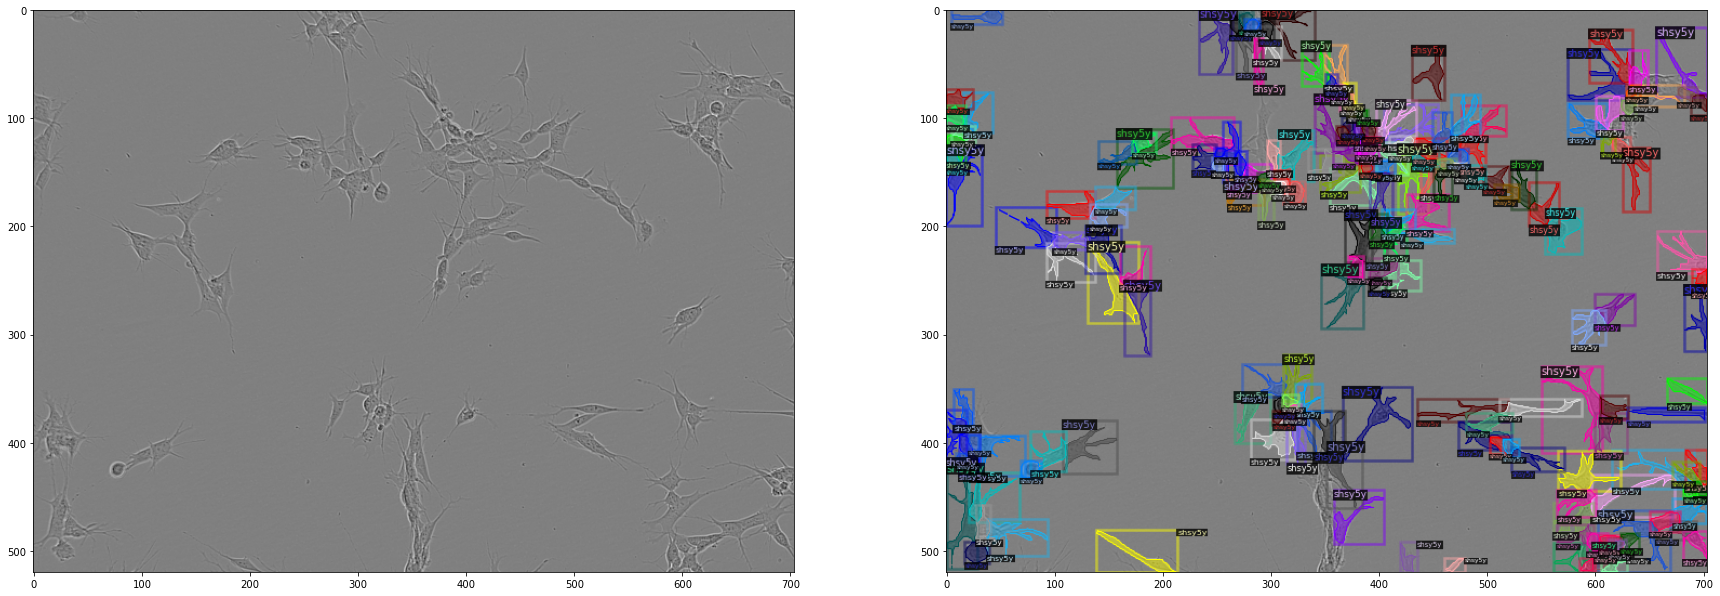

In [1]:
# !pip install pycocotools
# !pip install 'git+https://github.com/facebookresearch/detectron2.git'
import matplotlib.pyplot as plt
import cv2
import json
from pathlib import Path
from pycocotools import _mask
from pycocotools.coco import COCO
from detectron2.data import MetadataCatalog, DatasetCatalog
from detectron2.data.datasets import register_coco_instances
from detectron2.utils.visualizer import Visualizer, ColorMode

# Load LiveCell shsy5y data
live_cell_imgs_dir = Path('../input/LIVECell_dataset_2021/images/livecell_train_val_images/SHSY5Y')

register_coco_instances('sartorius_live_cell_train',{}, 'annotations_train.json', live_cell_imgs_dir)
register_coco_instances('sartorius_live_cell_val',{},'annotations_val.json', live_cell_imgs_dir)

live_cell_train_meta = MetadataCatalog.get('sartorius_live_cell_train')
live_cell_train_ds = DatasetCatalog.get('sartorius_live_cell_train')

live_cell_val_meta = MetadataCatalog.get('sartorius_live_cell_val')
live_cell_val_ds = DatasetCatalog.get('sartorius_live_cell_val')

train_sample = live_cell_train_ds[0]
img = cv2.imread(train_sample['file_name'])

visualizer = Visualizer(img[:, :, ::-1], metadata=live_cell_train_meta)
out = visualizer.draw_dataset_dict(train_sample)

_,ax = plt.subplots(1, 2, figsize=(30, 30))
ax[0].imshow(img)
ax[1].imshow(out.get_image()[:, :, ::-1])

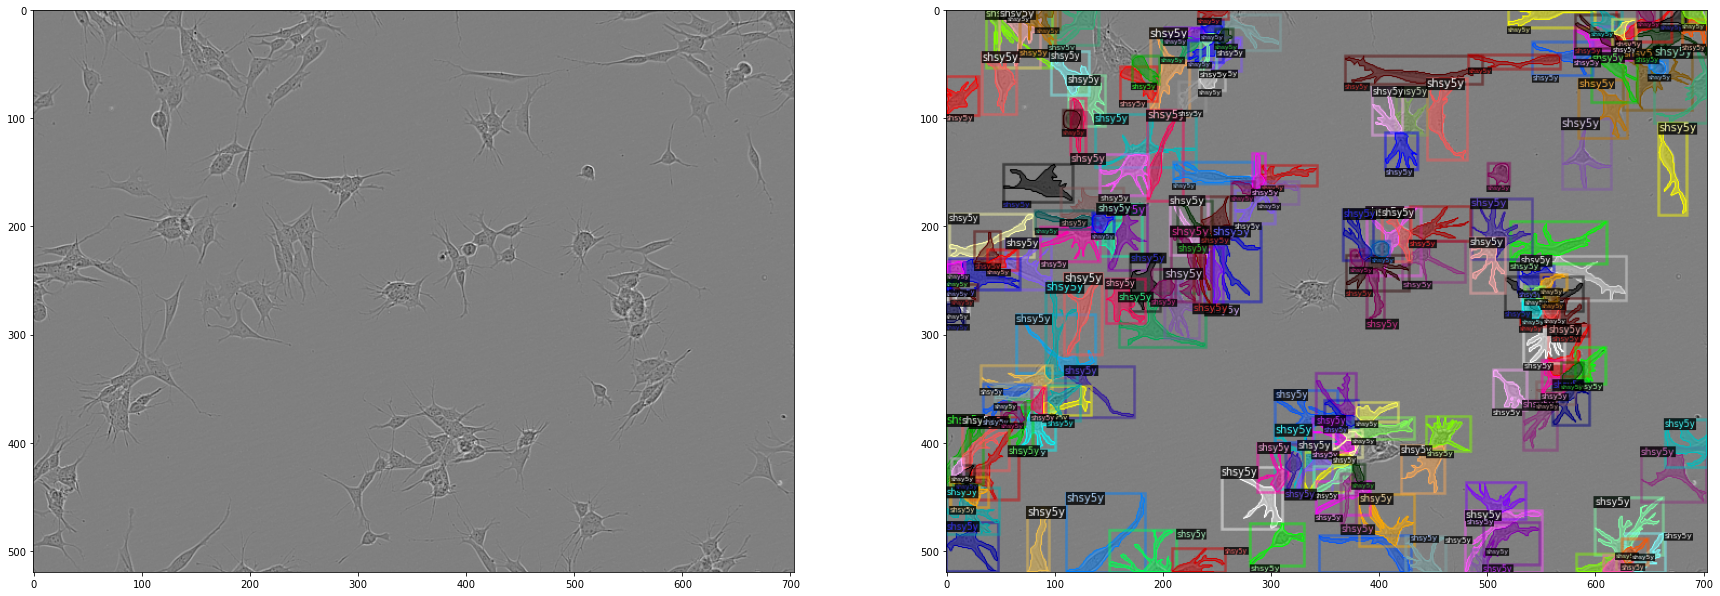

In [2]:
# Display a sample file to check the LiveCell shsy5y val data is loaded correctly
val_sample = live_cell_val_ds[0]
img = cv2.imread(val_sample['file_name'])

visualizer = Visualizer(img[:, :, ::-1], metadata=live_cell_val_meta)
out = visualizer.draw_dataset_dict(val_sample)

_,ax = plt.subplots(1, 2, figsize=(30, 30))
ax[0].imshow(img)
ax[1].imshow(out.get_image()[:, :, ::-1])

In [16]:
import matplotlib.pyplot as plt
import cv2
import json
from pathlib import Path
from pycocotools import _mask
from pycocotools.coco import COCO
from detectron2.data import MetadataCatalog, DatasetCatalog
from detectron2.data.datasets import register_coco_instances
from detectron2.utils.visualizer import Visualizer, ColorMode

# Read LiveCell shsy5y train and val data 
with open('../input/LIVECell_dataset_2021/annotations/LIVECell_single_cells/shsy5y/livecell_shsy5y_train.json') as f:
  data_train = json.loads(f.read())

with open('../input/LIVECell_dataset_2021/annotations/LIVECell_single_cells/shsy5y/livecell_shsy5y_val.json') as f:
  data_val = json.loads(f.read())

In [17]:
# Add categories
categories = [{'name':'shsy5y', 'id':1}, {'name':'astro', 'id':2}, {'name':'cort', 'id':3}]

data_train['categories'] = categories
data_val['categories'] = categories

In [18]:
# Format to COCO RLE format

for image in data_train['images']:
      image['id'] = str(image['id'])
for image in data_val['images']:
      image['id'] = str(image['id'])

train_annotations = []
for key in data_train['annotations'].keys():
  rle = _mask.frPoly(data_train['annotations'][key]['segmentation'],520,704)
  data_train['annotations'][key]['segmentation'] = {'size': rle[0]['size'], 'counts':rle[0]['counts'].decode('utf-8')}
  data_train['annotations'][key]['image_id'] = str(data_train['annotations'][key]['image_id'])
  train_annotations.append(data_train['annotations'][key])
data_train['annotations'] = train_annotations

val_annotations = []
for key in data_val['annotations'].keys():
  rle = _mask.frPoly(data_val['annotations'][key]['segmentation'],520,704)
  data_val['annotations'][key]['segmentation'] = {'size': rle[0]['size'], 'counts': rle[0]['counts'].decode('utf-8')}
  data_val['annotations'][key]['image_id'] = str(data_val['annotations'][key]['image_id'])
  val_annotations.append(data_val['annotations'][key])
data_val['annotations'] = val_annotations

In [19]:
# Save formatted data to JSON
with open('annotations_train.json', 'w', encoding='utf-8') as f:
  json.dump(data_train, f, ensure_ascii=True, indent=4)

with open('annotations_val.json', 'w', encoding='utf-8') as f:
  json.dump(data_val, f, ensure_ascii=True, indent=4)

In [1]:
# merge into the original
import matplotlib.pyplot as plt
import cv2
import json
from pathlib import Path
from pycocotools import _mask
from pycocotools.coco import COCO
from detectron2.data import MetadataCatalog, DatasetCatalog
from detectron2.data.datasets import register_coco_instances
from detectron2.utils.visualizer import Visualizer, ColorMode


with open("/home/yiw/kg/sart/folds/livecell_shsy5y_train.json") as f:
    livecell_shsy5y_train = json.loads(f.read())
with open("/home/yiw/kg/sart/folds/livecell_shsy5y_val.json") as f:
    livecell_shsy5y_val = json.loads(f.read())

In [2]:
import copy

with open("/home/yiw/kg/sart/folds/coco_cell_train_fold2.json") as f:
    fold2 = json.loads(f.read())

fold1_ext = copy.deepcopy(fold2)
fold1_ext["images"].extend(livecell_shsy5y_train["images"])
fold1_ext["annotations"].extend(livecell_shsy5y_train["annotations"])
fold1_ext["images"].extend(livecell_shsy5y_val["images"])
fold1_ext["annotations"].extend(livecell_shsy5y_val["annotations"])

with open('fold2_ext.json', 'w', encoding='utf-8') as f:
  json.dump(fold1_ext, f, ensure_ascii=True, indent=4)

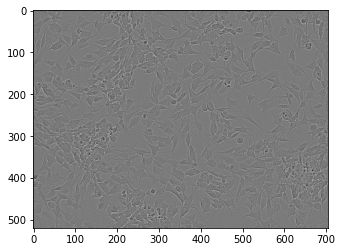

In [13]:
import matplotlib.pyplot as plt

plt.imshow(plt.imread("/home/yiw/kg/sart/input/LIVECell_dataset_2021/images/livecell_train_val_images/SHSY5Y/SHSY5Y_Phase_D10_2_03d12h00m_2.tif"), cmap="gray")